In [2]:
background_image_filename = 'D:\python_code\image\sushiplate.jpg'
mouse_image_filename = 'D:\python_code\image\image1.jpg'
#指定图像文件名称
 
import pygame
#导入pygame库
from pygame.locals import *
#导入一些常用的函数和常量
from sys import exit
#向sys模块借一个exit函数用来退出程序
 
pygame.init()
#初始化pygame,为使用硬件做准备
 
screen = pygame.display.set_mode((640, 480), NOFRAME, 32)
#创建了一个窗口
pygame.display.set_caption("Hello, World!")
#设置窗口标题
 
background = pygame.image.load(background_image_filename).convert()
mouse_cursor = pygame.image.load(mouse_image_filename).convert_alpha()
#加载并转换图像
 
while True:
#游戏主循环
 
    for event in pygame.event.get():
        if event.type == QUIT:
            #接收到退出事件后退出程序
            pygame.quit()
            exit()
 
    screen.blit(background, (0,0))
    #将背景图画上去
 
    x, y = pygame.mouse.get_pos()
    #获得鼠标位置
    x-= mouse_cursor.get_width() / 2
    y-= mouse_cursor.get_height() / 2
    #计算光标的左上角位置
    screen.blit(mouse_cursor, (x, y))
    #把光标画上去
 
    pygame.display.update()
    #刷新一下画面

SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


In [4]:
import matplotlib.image as img
lena=img.imread(background_image_filename)

In [5]:
lena.shape

(480, 640, 3)

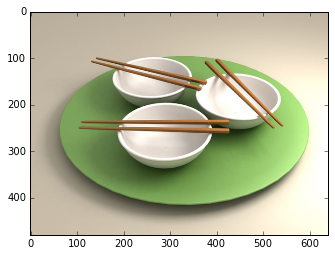

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(lena)

### 二、输出自己鼠标的位置

第一个程序那样是调用pygame.mouse.get_pos()来得到当前鼠标的位置，而现在利用事件可以直接获得！

处理鼠标事件

MOUSEMOTION事件会在鼠标动作的时候发生，它有三个参数：

buttons – 一个含有三个数字的元组，三个值分别代表左键、中键和右键，1就是按下了。

pos – 就是位置了……

rel – 代表了现在距离上次产生鼠标事件时的距离

和MOUSEMOTION类似的，我们还有MOUSEBUTTONDOWN和MOUSEBUTTONUP两个事件，看名字就明白是什么意思了。很多时候，你只需要知道鼠标点下就可以了，那就可以不用上面那个比较强大（也比较复杂）的事件了。它们的参数为：

button – 看清楚少了个s，这个值代表了哪个按键被操作

pos – 和上面一样

In [1]:
import pygame
from pygame.locals import *
from sys import exit
 
pygame.init()
SCREEN_SIZE = (640, 480)
screen = pygame.display.set_mode(SCREEN_SIZE, 0, 32)
 
font = pygame.font.SysFont("arial", 16);
font_height = font.get_linesize()
event_text = []
 
while True:
 
    event = pygame.event.wait()
    event_text.append(str(event))
    #获得时间的名称
    event_text = event_text[int(-SCREEN_SIZE[1]/font_height):]
    #这个切片操作保证了event_text里面只保留一个屏幕的文字
 
    if event.type == QUIT:
        pygame.quit()
        exit()
 
    screen.fill((255, 255, 255))
 
    y = SCREEN_SIZE[1]-font_height
    #找一个合适的起笔位置，最下面开始但是要留一行的空
    for text in reversed(event_text):
        screen.blit( font.render(text, True, (0, 255, 0)), (0, y) )  #（0，255，0）控制颜色
        #以后会讲
        y-=font_height
        #把笔提一行
 
    pygame.display.update()

SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


In [1]:
SCREEN_SIZE = (640, 480)

In [2]:
SCREEN_SIZE[1]

480

In [5]:
print (font_height)

19


### 三、处理键盘事件

键盘和游戏手柄的事件比较类似，为KEYDOWN和KEYUP，下面有一个例子来演示使用方向键移动一些东西。

KEYDOWN和KEYUP的参数描述如下：

key – 按下或者放开的键值，是一个数字，估计地球上很少有人可以记住，所以Pygame中你可以使用K_xxx来表示，比如字母a就是K_a，还有K_SPACE和K_RETURN等。

mod – 包含了组合键信息，如果mod & KMOD_CTRL是真的话，表示用户同时按下了Ctrl键。类似的还有KMOD_SHIFT，KMOD_ALT。

unicode – 代表了按下键的Unicode值

In [7]:
background_image_filename = 'D:\python_code\image\sushiplate.jpg'
 
import pygame
from pygame.locals import *
from sys import exit
 
pygame.init()
screen = pygame.display.set_mode((640, 480), 0, 32)
background = pygame.image.load(background_image_filename).convert()
 
x, y = 0, 0
move_x, move_y = 0, 0
 
while True:
    for event in pygame.event.get():
        if event.type == QUIT:
           pygame.quit()
           exit()
        if event.type == KEYDOWN:
            #键盘有按下？
            print (str(event))
            if event.key == K_LEFT:
                #按下的是左方向键的话，把x坐标减一
                move_x = -1
            elif event.key == K_RIGHT:
                #右方向键则加一
                move_x = 1
            elif event.key == K_UP:
                #类似了
                move_y = -1
            elif event.key == K_DOWN:
                move_y = 1
        elif event.type == KEYUP:
            #如果用户放开了键盘，图就不要动了
            move_x = 0
            move_y = 0
 
    #计算出新的坐标  #如果以下代码放入for循环内，则每发生一个event 才能检测出来，出现的问题是只能按一下动一下
    x+= move_x 
    y+= move_y

    screen.fill((0,0,0))
    screen.blit(background, (x,y))
    #在新的位置上画图
    pygame.display.update()

<Event(2-KeyDown {'scancode': 72, 'unicode': '', 'key': 273, 'mod': 0})>
<Event(2-KeyDown {'scancode': 77, 'unicode': '', 'key': 275, 'mod': 0})>
<Event(2-KeyDown {'scancode': 75, 'unicode': '', 'key': 276, 'mod': 0})>
<Event(2-KeyDown {'scancode': 80, 'unicode': '', 'key': 274, 'mod': 0})>
<Event(2-KeyDown {'scancode': 77, 'unicode': '', 'key': 275, 'mod': 0})>
<Event(2-KeyDown {'scancode': 72, 'unicode': '', 'key': 273, 'mod': 0})>
<Event(2-KeyDown {'scancode': 80, 'unicode': '', 'key': 274, 'mod': 0})>
<Event(2-KeyDown {'scancode': 75, 'unicode': '', 'key': 276, 'mod': 0})>
<Event(2-KeyDown {'scancode': 72, 'unicode': '', 'key': 273, 'mod': 0})>


SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


事件过滤

并不是所有的事件都需要处理的，就好像不是所有登门造访的人都是我们欢迎的一样。比如，俄罗斯方块就无视你的鼠标，而在游戏场景切换的时候，你按什么都是徒劳的。我们应该有一个方法来过滤掉一些我们不感兴趣的事件（当然我们可以不处理这些没兴趣的事件，但最好的方法还是让它们根本不进入我们的事件队列，就好像在门上贴着“XXX免进”一样），我们使用pygame.event.set_blocked(事件名)来完成。如果有好多事件需要过滤，可以传递一个列表，比如pygame.event.set_blocked([KEYDOWN, KEYUP])，如果你设置参数None，那么所有的事件有被打开了。与之相对的，我们使用pygame.event.set_allowed()来设定允许的事件。

产生事件

通常玩家做什么，Pygame就产生对应的事件就可以了，不过有的时候我们需要模拟出一些事件来，比如录像回放的时候，我们就要把用户的操作再现一遍。

In [10]:
my_event = pygame.event.Event(KEYDOWN, key=K_SPACE, mod=0, unicode=u' ')
#你也可以像下面这样写，看起来比较清晰（但字变多了……）
# my_event = pygame.event.Event(KEYDOWN, {"key":K_SPACE, "mod":0, "unicode":u' '})
# pygame.event.post(my_event)

你甚至可以产生一个完全自定义的全新事件，有些高级的话题，暂时不详细说，仅用代码演示一下：

In [13]:
pygame.init()
CATONKEYBOARD = USEREVENT+1
my_event = pygame.event.Event(CATONKEYBOARD, message="Bad cat!")
pygame.event.post(my_event)
 
#然后获得它
for event in pygame.event.get():
    if event.type == CATONKEYBOARD:
        print (event.message)

Bad cat!


### 三、显示

In [14]:
#获得您的机器支持的显示模式
import pygame
pygame.init()
pygame.display.list_modes()

[(2560, 1600),
 (2560, 1440),
 (2048, 1536),
 (1920, 1440),
 (1920, 1200),
 (1920, 1080),
 (1680, 1050),
 (1600, 1200),
 (1600, 1024),
 (1600, 900),
 (1366, 768),
 (1360, 768),
 (1280, 1024),
 (1280, 960),
 (1280, 800),
 (1280, 768),
 (1280, 720),
 (1152, 864),
 (1024, 768),
 (800, 600),
 (720, 576),
 (720, 480),
 (640, 480)]

In [16]:
#控制全屏显示
background_image_filename = 'D:\python_code\image\sushiplate.jpg'
 
import pygame
from pygame.locals import *
from sys import exit
 
pygame.init()
screen = pygame.display.set_mode((640, 480), 0, 32)
background = pygame.image.load(background_image_filename).convert()
 
Fullscreen = False
 
while True:
 
    for event in pygame.event.get():
        if event.type == QUIT:
            pygame.quit()
            exit()
    if event.type == KEYDOWN:
        if event.key == K_f:
            Fullscreen = not Fullscreen
            if Fullscreen:
                screen = pygame.display.set_mode((640, 480), FULLSCREEN, 32)
            else:
                screen = pygame.display.set_mode((640, 480), 0, 32)
 
    screen.blit(background, (0,0))
    pygame.display.update()

SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


可变尺寸的显示

虽然一般的程序窗口都能拖边框来改变大小，pygame的默认显示窗口是不行的，而事实上，很多游戏确实也不能改变显示窗口的大小，我们可以使用一个参数来改变这个默认行为。

当你更改大小的时候，后端控制台会显示出新的尺寸，这里我们学习到一个新的事件VIDEORESIZE，它包含如下内容：

size  —  一个二维元组，值为更改后的窗口尺寸，size[0]为宽，size[1]为高

w  —  宽

h  —  一目了然，高；之所以多出这两个，无非是为了方便

In [9]:
background_image_filename = 'D:\python_code\image\sushiplate.jpg'
 
import pygame
from pygame.locals import *
from sys import exit
 
SCREEN_SIZE = (640, 480)
 
pygame.init()
screen = pygame.display.set_mode(SCREEN_SIZE, RESIZABLE, 32)
 
background = pygame.image.load(background_image_filename).convert()
 
while True:
 
    event = pygame.event.wait()
    if event.type == QUIT:
        pygame.quit()
        exit()
    if event.type == VIDEORESIZE:
        SCREEN_SIZE = event.size
        screen = pygame.display.set_mode(SCREEN_SIZE, RESIZABLE, 32)
        pygame.display.set_caption("Window resized to "+str(event.size))
 
    screen_width, screen_height = SCREEN_SIZE
    # 这里需要重新填满窗口
    '''
    #拉动窗口，但是图片不跟着缩放
    for y in range(0, screen_height, background.get_height()):
        for x in range(0, screen_width, background.get_width()):
            screen.blit(background, (x, y))
    '''
    #图片跟着缩放为
    background = pygame.transform.scale(background, SCREEN_SIZE)
    screen.blit(background, (0, 0))
 
    pygame.display.update()

SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


In [3]:
print (screen_height)
print (background.get_height())

480
480


In [8]:
for i in range(0,3,2):
    print (i)

0
2


### 四、使用字体模块

my_font = pygame.font.SysFont("arial", 16)

第一个参数是字体名，第二个自然就是大小，一般来说“Arial”字体在很多系统都是存在的，如果找不到的话，就会使用一个默认的字体，这个默认的字体和每个操作系统相关，你也可以使用pygame.font.get_fonts()来获得当前系统所有可用字体。还有一个更好的方法的，使用TTF的方法：

my_font = pygame.font.Font("my_font.ttf", 16)

这个语句使用了一个叫做“my_font.ttf”，这个方法之所以好是因为你可以把字体文件随游戏一起分发，避免用户机器上没有需要的字体。。一旦你创建了一个font对象，你就可以使用render方法来写字了，然后就能blit到屏幕上：

text_surface = my_font.render("Pygame is cool!", True, (0,0,0), (255, 255, 255))

第一个参数是写的文字；第二个参数是个布尔值，以为这是否开启抗锯齿，就是说True的话字体会比较平滑，不过相应的速度有一点点影响；第三个参数是字体的颜色；第四个是背景色，如果你想没有背景色（也就是透明），那么可以不加这第四个参数。

In [10]:
my_name = "Will McGugan"
import pygame
pygame.init()
my_font = pygame.font.SysFont("arial", 64)
name_surface = my_font.render(my_name, True, (0, 0, 0), (255, 255, 255))
pygame.image.save(name_surface, "name.png")

追加说明一下如何显示中文，这在原书可是没有的哦：） 简单来说，首先你得用一个可以使用中文的字体，宋体、黑体什么的，或者你直接用中文TTF文件，然后文字使用unicode，即u”中文的文字”这种，最后不要忘了源文件里加上一句关于文件编码的“魔法注释”，具体的可以查一下Python的编码方面的文章。举一个这样的例子：

In [3]:
# -*- coding: utf-8 -*-
# 记住上面这行是必须的，而且保存文件的编码要一致！
import pygame
from pygame.locals import *
from sys import exit
 
pygame.init()
screen = pygame.display.set_mode((640, 480), 0, 32)
 
#font = pygame.font.SysFont("宋体", 40)
#上句在Linux可行，在我的Windows 7 64bit上不行，XP不知道行不行
#font = pygame.font.SysFont("simsunnsimsun", 40)
#用get_fonts()查看后看到了这个字体名，在我的机器上可以正常显示了
font = pygame.font.Font("simsun.ttc", 40)
#这句话总是可以的，所以还是TTF文件保险啊
text_surface = font.render(u"你好", True, (0, 0, 255))
 
x = 0
y = (480 - text_surface.get_height())/2
 
background = pygame.image.load("D:\python_code\image\sushiplate.jpg").convert()
 
while True:
    for event in pygame.event.get():
        if event.type == QUIT:
            pygame.quit()
            exit()
 
    screen.blit(background, (0, 0))
 
    x -= 1  # 文字滚动太快的话，改改这个数字
    if x < -text_surface.get_width():
        x = 640 - text_surface.get_width()
 
    screen.blit(text_surface, (x, y))
 
    pygame.display.update()

SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


### 五、图像像素，色彩

In [1]:
import pygame
pygame.init()
 
screen = pygame.display.set_mode((640, 480))
 
all_colors = pygame.Surface((4096,4096), depth=24)
 
for r in range(256):
    print (r+1, "out of 256")
    x = (r&15)*256    #取r低4位
    y = (r>>4)*256    #取r/16
    for g in range(256):
        for b in range(256):
            all_colors.set_at((x+g, y+b), (r, g, b))
 
pygame.image.save(all_colors, "allcolors.bmp")

1 out of 256
2 out of 256
3 out of 256
4 out of 256
5 out of 256
6 out of 256
7 out of 256
8 out of 256
9 out of 256
10 out of 256
11 out of 256
12 out of 256
13 out of 256
14 out of 256
15 out of 256
16 out of 256
17 out of 256
18 out of 256
19 out of 256
20 out of 256
21 out of 256
22 out of 256
23 out of 256
24 out of 256
25 out of 256
26 out of 256
27 out of 256
28 out of 256
29 out of 256
30 out of 256
31 out of 256
32 out of 256
33 out of 256
34 out of 256
35 out of 256
36 out of 256
37 out of 256
38 out of 256
39 out of 256
40 out of 256
41 out of 256
42 out of 256
43 out of 256
44 out of 256
45 out of 256
46 out of 256
47 out of 256
48 out of 256
49 out of 256
50 out of 256
51 out of 256
52 out of 256
53 out of 256
54 out of 256
55 out of 256
56 out of 256
57 out of 256
58 out of 256
59 out of 256
60 out of 256
61 out of 256
62 out of 256
63 out of 256
64 out of 256
65 out of 256
66 out of 256
67 out of 256
68 out of 256
69 out of 256
70 out of 256
71 out of 256
72 out of 256
7

In [1]:
1&15

1

In [2]:
16&15

0

In [3]:
16>>4

1

In [4]:
15>>4

0

In [5]:
48&15

0

In [6]:
48>>4

3

In [7]:
[3]*5

[3, 3, 3, 3, 3]

在这个例子里，你可以用鼠标移动三个白点，代表了三原色的量，下面就是不同混合得到的结果，在标题上你可以看到RGB三个数值。

pygame.draw.rect

　　原型：pygame.draw.rect(Surface, color, Rect, width=0): return Rect

　　用途：在Surface上绘制矩形，第二个参数是线条（或填充）的颜色，第三个参数Rect的形式是((x, y), (width, height))，表示的是所绘制矩形的区域，其中第一个元组(x, y)表示的是该矩形左上角的坐标，第二个元组 (width, height)表示的是矩形的宽度和高度。width表示线条的粗细，单位为像素；默认值为0，表示填充矩形内部。

　　此外，Surface.fill 同样可以用来绘制填充矩形。

In [2]:
import pygame
from pygame.locals import *
from sys import exit
 
pygame.init()
 
screen = pygame.display.set_mode((640, 480), 0, 32)
 
def create_scales(height):
    red_scale_surface = pygame.surface.Surface((640, height))
    green_scale_surface = pygame.surface.Surface((640, height))
    blue_scale_surface = pygame.surface.Surface((640, height))
    for x in range(640):
        c = int((x/640.)*255.)
        red = (c, 0, 0)
        green = (0, c, 0)
        blue = (0, 0, c)
        line_rect = Rect(x, 0, 1, height)
        pygame.draw.rect(red_scale_surface, red, line_rect)  #pygame.draw.rect()用来创建一个矩形。Rect(left,top,width,height)用来定义位置和宽高
        pygame.draw.rect(green_scale_surface, green, line_rect)
        pygame.draw.rect(blue_scale_surface, blue, line_rect)
    return red_scale_surface, green_scale_surface, blue_scale_surface
 
red_scale, green_scale, blue_scale = create_scales(80)
 
color = [127, 127, 127]
 
while True:
 
    for event in pygame.event.get():
        if event.type == QUIT:
            pygame.quit()
            exit()
 
    screen.fill((0, 0, 0))
 
    screen.blit(red_scale, (0, 00))
    screen.blit(green_scale, (0, 80))
    screen.blit(blue_scale, (0, 160))
 
    x, y = pygame.mouse.get_pos()
 
    if pygame.mouse.get_pressed()[0]:
        for component in range(3):
            if y > component*80 and y < (component+1)*80:
                color[component] = int((x/639.)*255.)
        pygame.display.set_caption("PyGame Color Test - "+str(tuple(color)))
 
    for component in range(3):
        pos = ( int((color[component]/255.)*639), component*80+40 )
        pygame.draw.circle(screen, (255, 255, 255), pos, 20)
 
    pygame.draw.rect(screen, tuple(color), (0, 240, 640, 240))
 
    pygame.display.update()

SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


颜色的缩放

“缩放颜色”并不是一种合适的说法，它的准确意义就是上面所说的把颜色变亮或者变暗。一般来说，把颜色的RGB每一个数值乘以一个小于1的正小数，颜色看起来就会变暗了（记住RGB都是整数所以可能需要取整一下）。我们很容易可以写一个缩放颜色的函数出来，我就不赘述了。

很自然的可以想到，如果乘以一个大于1的数，颜色就会变亮，不过同样要记住每个数值最多255，所以一旦超过，你得把它归为255！使用Python的内置函数min，你可以方便的做到这事情，也不多说了。如果你乘的数字偏大，颜色很容易就为变成纯白色，就失去了原来的色调。而且RGB也不可能是负数，所以谨慎选择你的缩放系数！

颜色的混合

很多时候我们还需要混合颜色，比如一个僵尸在路过一个火山熔岩坑的时候，它会由绿色变成橙红色，再变为正常的绿色，这个过程必须表现的很平滑，这时候我们就需要混合颜色。

我们用一种叫做“线性插值(linear interpolation)”的方法来做这件事情。为了找到两种颜色的中间色，我们将这第二种颜色与第一种颜色的差乘以一个0~1之间的小数，然后再加上第一种颜色就行了。如果这个数为0，结果就完全是第一种颜色；是1，结果就只剩下第二种颜色；中间的小数则会皆有两者的特色。

In [5]:
import pygame
from pygame.locals import *
from sys import exit
 
pygame.init()
screen = pygame.display.set_mode((640, 480), 0, 32)
 
color1 = (221, 99, 20)
color2 = (96, 130, 51)
factor = 0.
 
def blend_color(color1, color2, blend_factor):
    r1, g1, b1 = color1
    r2, g2, b2 = color2
    r = r1 + (r2 - r1) * blend_factor
    g = g1 + (g2 - g1) * blend_factor
    b = b1 + (b2 - b1) * blend_factor
    return int(r), int(g), int(b)
 
while True:
 
    for event in pygame.event.get():
        if event.type == QUIT:
            pygame.quit()
            exit()
 
    screen.fill((255,255,255))
 
    tri = [ (0, 120), (639, 100), (639, 140) ]
    pygame.draw.polygon(screen, (0, 255, 0), tri)
    pygame.draw.circle(screen, (0, 0, 0), (int(factor * 639.0), 120), 10)
 
    x, y = pygame.mouse.get_pos()
    if pygame.mouse.get_pressed()[0]:
        factor = x / 639.0
        pygame.display.set_caption("Pygame Color Blend Test - %.3f" % factor)
 
    color = blend_color(color1, color2 , factor)
    pygame.draw.rect(screen, color, (0, 240, 640, 240))
 
    pygame.display.update()

SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


## 六、surface

### 使用Surface对象

对于Pygame而已，加载图片就是pygame.image.load，给它一个文件名然后就还给你一个surface对象。尽管读入的图像格式各不相同，surface对象隐藏了这些不同。你可以对一个Surface对象进行涂画、变形、复制等各种操作。事实上，屏幕也只是一个surface，pygame.display.set_mode就返回了一个屏幕surface对象。

创建Surfaces对象

一种方法就是刚刚说的pygame.image.load，这个surface有着和图像相同的尺寸和颜色；另外一种方法是指定尺寸创建一个空的surface，下面的语句创建一个256×256像素的surface：

bland_surface = pygame.Surface((256, 256))

如果不指定尺寸，那么就创建一个和屏幕一样大小的。

你还有两个参数可选，第一个是flags：

HWSURFACE – 类似于前面讲的，更快！不过最好不设定，Pygmae可以自己优化。

SRCALPHA – 有Alpha通道的surface，如果你需要透明，就要这个选项。这个选项的使用需要第二个参数为32~

第二个参数是depth，和pygame.display.set_mode中的一样，你可以不设定，Pygame会自动设的和display一致。不过如果你使用了SRCALPHA，还是设为32吧：

bland_alpha_surface = pygame.Surface((256, 256), flags=SRCALPHA, depth=32)

### 转换Surfaces

通常你不用在意surface里的具体内容，不过也许需要把这些surface转换一下以获得更高的性能，

background = pygame.image.load(background_image_filename).convert()

mouse_cursor = pygame.image.load(mouse_image_filename).convert_alpha()

第一句是普通的转换，相同于display；第二句是带alpha通道的转换。如果你给convert或者conver_alpha一个surface对象作为参数，那么这个会被作为目标来转换。

### 矩形对象(Rectangle Objects)

一般来说在制定一个区域的时候，矩形是必须的，比如在屏幕的一部分画东西。在pygame中矩形对象极为常用，它的指定方法可以用一个四元素的元组，或者两个二元素的元组，前两个数为左上坐标，后两位为右下坐标。

Pygame中有一个Rect类，用来存储和处理矩形对象（包含在pygame.locals中，所以如果你写了from pygame.locals import *就可以直接用这个对象了），比如：

In [6]:
my_rect1 = (100, 100, 200, 150)
my_rect2 = ((100, 100), (200, 150))
#上两种为基础方法，表示的矩形也是一样的
my_rect3 = Rect(100, 100, 200, 150)
my_rect4 = Rect((100, 100), (200, 150))

### 剪裁(Clipping)

通常游戏的时候你只需要绘制屏幕的一部分。比如魔兽上面是菜单，下面是操作面板，中间的小兵和英雄打的不可开交时候，上下的部分也是保持相对不动的。为了实现这一点，surface就有了一种叫裁剪区域（clipping area)的东西，也是一个矩形，定义了哪部分会被绘制，也就是说一旦定义了这个区域，那么只有这个区域内的像素会被修改，其他的位置保持不变，默认情况下，这个区域是所有地方。我们可以使用set_clip来设定，使用get_clip来获得这个区域。

screen.set_clip(0, 400, 200, 600)
draw_map()
#在左下角画地图
screen.set_clip(0, 0, 800, 60)
draw_panel()
#在上方画菜单面板

### 子表面(Subsurfaces)

Subsurface就是在一个Surface中再提取一个Surface，记住当你往Subsurface上画东西的时候，同时也向父表面上操作。这可以用来绘制图形文字，尽管pygame.font可以用来写很不错的字，但只是单色，游戏可能需要更丰富的表现，这时候你可以把每个字母（中文的话有些吃力了）各自做成一个图片，不过更好的方法是在一张图片上画满所有的字母。把整张图读入，然后再用Subsurface把字母一个一个“抠”出来，就像下面这样：

my_font_image = Pygame.load("font.png")
letters = []
letters["a"] = my_font_image.subsurface((0,0), (80,80))
letters["b"] = my_font_image.subsurface((80,0), (80,80))

### 填充Surface

填充有时候可以作为一种清屏的操作，把整个surface填上一种颜色：

screen.fill((0, 0, 0))

同样可以提供一个矩形来制定填充哪个部分（这也可以作为一种画矩形的方法）。

### 设置Surface的像素

我们能对Surface做的最基本的操作就是设置一个像素的色彩了，虽然我们基本不会这么做，但还是要了解。set_at方法可以做到这一点，它的参数是坐标和颜色，下面的小脚本会随机的在屏幕上画点：

In [2]:
import pygame
from pygame.locals import *
from sys import exit
from random import randint
 
pygame.init()
screen = pygame.display.set_mode((640, 480), 0, 32)
 
while True:
    for event in pygame.event.get():
        if event.type == QUIT:
            pygame.quit()
            exit()
 
    rand_col = (randint(0, 255), randint(0, 255), randint(0, 255))
    #screen.lock()    #很快你就会知道这两句lock和unlock的意思了
    for _ in range(100):
        rand_pos = (randint(0, 639), randint(0, 479))
        screen.set_at(rand_pos, rand_col)
    #screen.unlock()
 
    pygame.display.update()

SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


### 获得Surface上的像素

set_at的兄弟get_at可以帮我们做这件事，它接受一个坐标返回指定坐标点上的颜色。不过记住get_at在对hardware surface操作的时候很慢，而全屏的时候总是hardware的，所以慎用这个方法！

### 锁定Surface

当Pygame往surface上画东西的时候，首先会把surface锁住，以保证不会有其它的进程来干扰，画完之后再解锁。锁和解锁时自动发生的，所以有时候可能不那么有效率，比如上面的例子，每次画100个点，那么就得锁解锁100次，现在我们把两句注释去掉，再执行看看是不是更快了（好吧，其实我没感觉出来，因为现在的机器性能都不错，这么点的差异还不太感觉的出来。不过请相信我~复杂的情况下会影响效率的）？

当你手动加锁的时候，一定不要忘记解锁，否则pygame有可能会失去响应。虽然上面的例子可能没问题，但是隐含的bug是我们一定要避免的事情。

### Blitting

blit的的中文翻译给人摸不着头脑的感觉，可以译为位块传送（bit block transfer），其意义是将一个平面的一部分或全部图象整块从这个平面复制到另一个平面，下面还是直接使用英文。

blit是对表面做的最多的操作，我们在前面的程序中已经多次用到，不多说了；blit的还有一种用法，往往用在对动画的表现上，比如下例通过对frame_no的值的改变，我们可以把不同的帧（同一副图的不同位置）画到屏幕上：

screen.blit(ogre, (300, 200), (100 * frame_no, 0, 100, 100))

## 七、绘制图形 pygame.draw

pygame.draw.rect

用法：pygame.draw.rect(Surface, color, Rect, width=0)

pygame.draw.rect在surface上画一个矩形，除了surface和color，rect接受一个矩形的坐标和线宽参数，如果线宽是0或省略，则填充。我们有一个另外的方法来画矩形——fill方法，如果你还记得的话。事实上fill可能还会快一点点，因为fill由显卡来完成。

pygame.draw.polygon

用法：pygame.draw.polygon(Surface, color, pointlist, width=0)

polygon就是多边形，用法类似rect，第一、第二、第四的参数都是相同的，只不过polygon会接受一系列坐标的列表，代表了各个顶点。

pygame.draw.circle

用法：pygame.draw.circle(Surface, color, pos, radius, width=0)

很简单，画一个圆。与其他不同的是，它接收一个圆心坐标和半径参数。

pygame.draw.ellipse

用法：pygame.draw.ellipse(Surface, color, Rect, width=0)

你可以把一个ellipse想象成一个被压扁的圆，事实上，它是可以被一个矩形装起来的。pygame.draw.ellipse的第三个参数就是这个椭圆的外接矩形。

pygame.draw.arc

用法：pygame.draw.arc(Surface, color, Rect, start_angle, stop_angle, width=1)

arc是椭圆的一部分，所以它的参数也就比椭圆多一点。但它是不封闭的，因此没有fill方法。start_angle和stop_angle为开始和结束的角度。

pygame.draw.line

用法：pygame.draw.line(Surface, color, start_pos, end_pos, width=1)

我相信所有的人都能看明白。

pygame.draw.lines

用法：pygame.draw.lines(Surface, color, closed, pointlist, width=1)

closed是一个布尔变量，指明是否需要多画一条线来使这些线条闭合（感觉就和polygone一样了），pointlist是一个点的数组。

上面的表中我们还有aaline和aalines，玩游戏的都知道开出“抗锯齿（antialiasing）”效果会让画面更好看一些，模型的边就不会是锯齿形的了，这两个方法就是在画线的时候做这事情的，参数和上面一样，省略。

In [5]:
import pygame
from pygame.locals import *
from sys import exit
 
from random import *
from math import pi
 
pygame.init()
screen = pygame.display.set_mode((640, 480), 0, 32)
points = []
 
while True:
 
    for event in pygame.event.get():
        if event.type == QUIT:
            pygame.quit()
            exit()
        if event.type == KEYDOWN:
            # 按任意键可以清屏并把点回复到原始状态
            points = []
            screen.fill((255,255,255))
        if event.type == MOUSEBUTTONDOWN:
            screen.fill((255,255,255))
            # 画随机矩形
            rc = (randint(0,255), randint(0,255), randint(0,255))
            rp = (randint(0,639), randint(0,479))
            rs = (639-randint(rp[0], 639), 479-randint(rp[1], 479))
            pygame.draw.rect(screen, rc, Rect(rp, rs))
            # 画随机圆形
            rc = (randint(0,255), randint(0,255), randint(0,255))
            rp = (randint(0,639), randint(0,479))
            rr = randint(1, 200)
            pygame.draw.circle(screen, rc, rp, rr)
            # 获得当前鼠标点击位置
            x, y = pygame.mouse.get_pos()
            points.append((x, y))
            # 根据点击位置画弧线
            angle = (x/639.)*pi*2.
            pygame.draw.arc(screen, (0,0,0), (0,0,639,479), 0, angle, 3)
            # 根据点击位置画椭圆
            pygame.draw.ellipse(screen, (0, 255, 0), (0, 0, x, y))
            # 从左上和右下画两根线连接到点击位置
            pygame.draw.line(screen, (0, 0, 255), (0, 0), (x, y))
            pygame.draw.line(screen, (255, 0, 0), (640, 480), (x, y))
            # 画点击轨迹图
            if len(points) > 1:
                pygame.draw.lines(screen, (155, 155, 0), False, points, 2)
            # 和轨迹图基本一样，只不过是闭合的，因为会覆盖，所以这里注释了
            #if len(points) >= 3:
            #    pygame.draw.polygon(screen, (0, 155, 155), points, 2)
            # 把每个点画明显一点
            for p in points:
                pygame.draw.circle(screen, (155, 155, 155), p, 3)
 
    pygame.display.update()

SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


## 八、游戏运动

理解帧率

这是一个被说烂了的词，FPS（Frame Per Second）是游戏和硬件间较量的永恒话题，我也不想多插话了，相信玩游戏的朋友都知道。

只是记住几个常用的量：一般的电视画面是24FPS；30FPS基本可以给玩家提供流程的体验了；LCD的话，60FPS是常用的刷新率，所以你的游戏的帧率再高也就没什么意义了；而绝大多数地球人都无法分辨70FPS以上的画面了！

直线运动

我们先来看一下初中一开始就学习的直线运动，我们让一开始的程序中出现的那条鱼自己动起来~

In [3]:
background_image_filename = 'D:\python_code\image\sushiplate.jpg'
sprite_image_filename = 'D:\python_code\image\image7.png'
 
import pygame
from pygame.locals import *
from sys import exit
 
pygame.init()
 
screen = pygame.display.set_mode((640, 480), 0, 32)
 
background = pygame.image.load(background_image_filename).convert()
sprite = pygame.image.load(sprite_image_filename)
 
# sprite的起始x坐标
x = 0.
 
while True:
 
    for event in pygame.event.get():
        if event.type == QUIT:
            pygame.quit()
            exit()
 
    screen.blit(background, (0,0))
    screen.blit(sprite, (x, 100))
    x+= 10.     #如果你的机器性能太好以至于看不清，可以把这个数字改小一些
 
    # 如果移动出屏幕了，就搬到开始位置继续
    if x > 640.:
        x = 0.    
 
    pygame.display.update()

SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


### 关于时间

有一个解决上述问题的方法，就是让我们的动画基于时间运作，我们需要知道上一个画面到现在经过了多少时间，然后我们才能决定是否开始绘制下一幅。pygame.time模块给我们提供了一个Clock的对象，使我们可以轻易做到这一些：

clock = pygame.time.Clock()

time_passed = clock.tick()

time_passed = clock.tick(30)

第一行初始化了一个Clock对象；第二行的意识是返回一个上次调用的时间（以毫秒计）；第三行非常有用，在每一个循环中加上它，那么给tick方法加上的参数就成为了游戏绘制的最大帧率，这样的话，游戏就不会用掉你所有的CPU资源了！但是这仅仅是“最大帧率”，并不能代表用户看到的就是这个数字，有些时候机器性能不足，或者动画太复杂，实际的帧率达不到这个值，我们需要一种更有效的手段来控制我们的动画效果。

In [2]:
background_image_filename = 'D:\python_code\image\sushiplate.jpg'
sprite_image_filename = 'D:\python_code\image\image7.png'
 
import pygame
from pygame.locals import *
from sys import exit
 
pygame.init()
 
screen = pygame.display.set_mode((640, 480), 0, 32)
 
background = pygame.image.load(background_image_filename).convert()
sprite = pygame.image.load(sprite_image_filename)
 
# Clock对象
clock = pygame.time.Clock()
 
x = 0.
# 速度（像素/秒）
speed = 250.
 
while True:
 
    for event in pygame.event.get():
        if event.type == QUIT:
            pygame.quit()
            exit()
 
    screen.blit(background, (0,0))
    screen.blit(sprite, (x, 100))    
 
    time_passed = clock.tick()
    time_passed_seconds = time_passed / 1000.0
 
    distance_moved = time_passed_seconds * speed
    x += distance_moved
 
    # 想一下，这里减去640和直接归零有何不同？
    if x > 640.:
        x -= 640.    
 
    pygame.display.update()

SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


### 斜线运动

下面有一个更有趣一些的程序，不再是单纯的直线运动，而是有点像屏保一样，碰到了壁会反弹。不过也并没有新的东西在里面，原理上来说，反弹只不过是把速度取反了而已~ 可以先试着自己写一个，然后与这个对照一下。

In [1]:
background_image_filename = 'D:\python_code\image\sushiplate.jpg'
sprite_image_filename = 'D:\python_code\image\image7.png'
 
import pygame
from pygame.locals import *
from sys import exit
 
pygame.init()
 
screen = pygame.display.set_mode((640, 480), 0, 32)
 
background = pygame.image.load(background_image_filename).convert()
sprite = pygame.image.load(sprite_image_filename).convert_alpha()
 
clock = pygame.time.Clock()
 
x, y = 100., 100.
speed_x, speed_y = 133., 170.
 
while True:
 
    for event in pygame.event.get():
        if event.type == QUIT:
            pygame.quit()
            exit()
 
    screen.blit(background, (0,0))
    screen.blit(sprite, (x, y))
 
    time_passed = clock.tick(30)
    time_passed_seconds = time_passed / 1000.0
 
    x += speed_x * time_passed_seconds
    y += speed_y * time_passed_seconds    
 
    # 到达边界则把速度反向
    if x > 640 - sprite.get_width():
        speed_x = -speed_x
        x = 640 - sprite.get_width()
    elif x < 0:
        speed_x = -speed_x
        x = 0.
 
    if y > 480 - sprite.get_height():
        speed_y = -speed_y
        y = 480 - sprite.get_height()
    elif y < 0:
        speed_y = -speed_y
        y = 0
 
    pygame.display.update()

SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


### 九、使用向量的游戏动画 

In [6]:
class Vector2(object):
    def __init__(self, x=0.0, y=0.0):
        self.x = x
        self.y = y
    def __str__(self):
        return "(%s, %s)"%(self.x, self.y)
 
    @classmethod
    def from_points(cls, P1, P2):
        return cls( P2[0] - P1[0], P2[1] - P1[1] )
#我们可以使用下面的方法来计算两个点之间的向量
A = (10.0, 20.0)
B = (30.0, 35.0)
AB = Vector2.from_points(A, B)
print (AB)

(20.0, 15.0)


#单位向量
    def normalize(self):
        magnitude = self.get_magnitude()
        self.x /= magnitude
        self.y /= magnitude

In [1]:
background_image_filename = 'D:\python_code\image\sushiplate.jpg'
sprite_image_filename = 'D:\python_code\image\image7.png'
 
import pygame
from pygame.locals import *
from sys import exit
from gameobjects.vector2 import Vector2
 
pygame.init()
 
screen = pygame.display.set_mode((640, 480), 0, 32)
 
background = pygame.image.load(background_image_filename).convert()
sprite = pygame.image.load(sprite_image_filename).convert_alpha()
 
clock = pygame.time.Clock()
 
position = Vector2(100.0, 100.0)
heading = Vector2()
 
while True:
 
    for event in pygame.event.get():
        if event.type == QUIT:
            pygame.quit()
            exit()
 
    screen.blit(background, (0,0))
    screen.blit(sprite, position)
 
    time_passed = clock.tick()
    time_passed_seconds = time_passed / 1000.0
 
    # 参数前面加*意味着把列表或元组展开
    destination = Vector2( *pygame.mouse.get_pos() ) - Vector2( *sprite.get_size() )*0.5
    # 计算鱼儿当前位置到鼠标位置的向量
    vector_to_mouse = Vector2.from_points(position, destination)
    # 向量规格化
    vector_to_mouse.normalize()
 
    # 这个heading可以看做是鱼的速度，但是由于这样的运算，鱼的速度就不断改变了
    # 在没有到达鼠标时，加速运动，超过以后则减速。因而鱼会在鼠标附近晃动。
    heading = heading + (vector_to_mouse * .6)    
 
    position += heading * time_passed_seconds
    pygame.display.update()

SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


In [ ]:
# -*- coding: utf-8 -*-

from sys import exit
import pygame
from gameobjects.vector2 import Vector2
'''
pygame.key.get_pressed() 获得所有按下的键值,返回一个元组,这个元组的索引就是键值,对应的就是是否按下
key.get_focused() 返回当前的pygame窗口是否激活
key.get_mods() 按下的组合键（Alt, Ctrl, Shift）
key.set_mods() 模拟按下组合键的效果（KMOD_ALT, KMOD_CTRL, KMOD_SHIFT）
key.set_repeat() 无参数调用设置pygame不产生重复按键事件,二参数(delay, interval)调用设置重复事件发生的时间
key.name() 接受键值返回键名

'''
bg_file = 'D:\python_code\image\sushiplate.jpg'
fish_file = 'D:\python_code\image\image7.png'

def test():
    pygame.init()
    # 创建一个窗口, 返回的是一个Surface对象
    screen = pygame.display.set_mode((500, 500))
    # 设置标题
    pygame.display.set_caption('hello')
    times = 0
    while True:
        event = pygame.event.poll()
    if event.type == pygame.QUIT:
        pygame.quit()
        exit()
    if pygame.key.get_pressed()[ord(' ')]:
        print ('space press',times)
    times += 1
# print pygame.key.get_focused()
# print pygame.key.get_mods()
# print pygame.key.set_repeat()
# print pygame.key.name(97)

def test1():
    pygame.init()
    background = pygame.image.load(bg_file)
    sprite = pygame.image.load(fish_file)
    sprite_speed = 300
    # 创建一个窗口, 返回的是一个Surface对象
    screen = pygame.display.set_mode((500, 500))
    # 设置标题
    pygame.display.set_caption('hello')
    clock = pygame.time.Clock()
    sprite_pos = (Vector2(*screen.get_size()) - Vector2(*sprite.get_size()))*0.5
    while True:
        event = pygame.event.poll()
    if event.type == pygame.QUIT:
        pygame.quit()
        exit()
    pressed_keys = pygame.key.get_pressed()
    key_direction = Vector2(0, 0)
    if pressed_keys[pygame.K_LEFT]:
        key_direction.x -=1
    if pressed_keys[pygame.K_RIGHT]:
        key_direction.x += 1
    if pressed_keys[pygame.K_UP]:
        key_direction.y -= 1
    if pressed_keys[pygame.K_DOWN]:
        key_direction.y += 1
    # 通过向量控制方向
    key_direction.normalize()
    time_passed = clock.tick()
    time_passed_seconds = time_passed / 1000.0
    # 方向乘以 v * t,可得出移动后的位置
    sprite_pos += key_direction * sprite_speed * time_passed_seconds
    if sprite_pos.x>screen.get_width() - sprite.get_width():
        sprite_pos.x = screen.get_width() - sprite.get_width()
    if sprite_pos.y>screen.get_height() - sprite.get_height():
        sprite_pos.y = screen.get_height() - sprite.get_height()

    screen.blit(background, (0, 0))
    screen.blit(sprite, sprite_pos)
    pygame.display.update()

if __name__ == "__main__":
    test1()

### 十、键盘设置

event.type == KEYDOWN的时候，在判断event.key的种类，而各个种类也使用K_a，K_b……等判断。这里再介绍一个pygame.key.get_pressed()来获得所有按下的键值，它会返回一个元组。这个元组的索引就是键值，对应的就是是否按下，比如说：

pressed_keys = pygame.key.get_pressed()
if pressed_keys[K_SPACE]:
    # Space key has been pressed
    fire()pressed_keys = pygame.key.get_pressed()

当然key模块下还有很多函数：

key.get_focused —— 返回当前的pygame窗口是否激活
key.get_pressed —— 刚刚解释过了
key.get_mods —— 按下的组合键（Alt, Ctrl, Shift）
key.set_mods —— 你也可以模拟按下组合键的效果（KMOD_ALT, KMOD_CTRL, KMOD_SHIFT）
key.set_repeat —— 无参数调用设置pygame不产生重复按键事件，二参数(delay, interval)调用设置重复事件发生的时间
key.name —— 接受键值返回键名

In [3]:
background_image_filename = 'D:\python_code\image\sushiplate.jpg'
sprite_image_filename = 'D:\python_code\image\image7.png'
 
import pygame
from pygame.locals import *
from sys import exit
from gameobjects.vector2 import Vector2
 
pygame.init()
 
screen = pygame.display.set_mode((640, 480), 0, 32)
 
background = pygame.image.load(background_image_filename).convert()
sprite = pygame.image.load(sprite_image_filename).convert_alpha()
 
clock = pygame.time.Clock()
 
sprite_pos = Vector2(200, 150)
sprite_speed = 300.
 
while True:
 
    for event in pygame.event.get():
        if event.type == QUIT:
            pygame.quit()
            exit()
 
    pressed_keys = pygame.key.get_pressed()
 
    key_direction = Vector2(0, 0)
    if pressed_keys[K_LEFT]:
        key_direction.x = -1
    elif pressed_keys[K_RIGHT]:
        key_direction.x = +1
    if pressed_keys[K_UP]:
        key_direction.y = -1
    elif pressed_keys[K_DOWN]:
        key_direction.y = +1
 
    key_direction.normalize()
 
    screen.blit(background, (0,0))
    screen.blit(sprite, sprite_pos)
 
    time_passed = clock.tick(30)
    time_passed_seconds = time_passed / 1000.0
 
    sprite_pos+= key_direction * sprite_speed * time_passed_seconds
 
    pygame.display.update()

SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


先转向，再移动

In [1]:
background_image_filename = 'D:\python_code\image\sushiplate.jpg'
sprite_image_filename = 'D:\python_code\image\image7.png'
 
import pygame
from pygame.locals import *
from sys import exit
from gameobjects.vector2 import Vector2
from math import *
 
pygame.init()
 
screen = pygame.display.set_mode((640, 480), 0, 32)
 
background = pygame.image.load(background_image_filename).convert()
sprite = pygame.image.load(sprite_image_filename).convert_alpha()
 
clock = pygame.time.Clock()
 
sprite_pos = Vector2(200, 150)   # 初始位置
sprite_speed = 300.     # 每秒前进的像素数（速度）
sprite_rotation = 0.      # 初始角度
sprite_rotation_speed = 360. # 每秒转动的角度数（转速）
 
while True:
 
    for event in pygame.event.get():
        if event.type == QUIT:
            pygame.quit()
            exit()
 
    pressed_keys = pygame.key.get_pressed()
 
    rotation_direction = 0.
    movement_direction = 0.
 
    # 更改角度
    if pressed_keys[K_LEFT]:
        rotation_direction = +1.
    if pressed_keys[K_RIGHT]:
        rotation_direction = -1.
    # 前进、后退
    if pressed_keys[K_UP]:
        movement_direction = +1.
    if pressed_keys[K_DOWN]:
        movement_direction = -1.
 
    screen.blit(background, (0,0))
 
    # 获得一条转向后的鱼
    rotated_sprite = pygame.transform.rotate(sprite, sprite_rotation)
    # 转向后，图片的长宽会变化，因为图片永远是矩形，为了放得下一个转向后的矩形，外接的矩形势必会比较大
    w, h = rotated_sprite.get_size()
    # 获得绘制图片的左上角（感谢pltc325网友的指正）
    sprite_draw_pos = Vector2(sprite_pos.x-w/2, sprite_pos.y-h/2)
    screen.blit(rotated_sprite, sprite_draw_pos)
 
    time_passed = clock.tick()
    time_passed_seconds = time_passed / 1000.0
 
    # 图片的转向速度也需要和行进速度一样，通过时间来控制
    sprite_rotation += rotation_direction * sprite_rotation_speed * time_passed_seconds
 
    # 获得前进（x方向和y方向），这两个需要一点点三角的知识
    heading_x = sin(sprite_rotation*pi/180.)
    heading_y = cos(sprite_rotation*pi/180.)
    # 转换为单位速度向量
    heading = Vector2(heading_x, heading_y)
    # 转换为速度
    heading *= movement_direction
 
    sprite_pos+= heading * sprite_speed * time_passed_seconds
 
    pygame.display.update()

SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


### 十一、使用鼠标控制精灵

我们已经看到如何画一个光标了，只是简单的在鼠标坐标上画一个图像而已，我们可以从MOUSEMOTION或者pygame.mouse.get_pos方法来获得坐标。但我们还可以使用这个坐标来控制方向，比如在3D游戏中，可以使用鼠标来控制视角。这种时候，我们不使用鼠标的位置，因为鼠标可能会跑到窗口外面，我们使用鼠标现在与上一帧的相对偏移量。在下一个例子中，我们演示使用鼠标的左右移动来转动我们熟悉的小鱼儿：

总结一下pygame.mouse的函数：

pygame.mouse.get_pressed —— 返回按键按下情况，返回的是一元组，分别为(左键, 中键, 右键)，如按下则为True
pygame.mouse.get_rel —— 返回相对偏移量，(x方向, y方向)的一元组
pygame.mouse.get_pos —— 返回当前鼠标位置(x, y)
pygame.mouse.set_pos —— 显而易见，设置鼠标位置
pygame.mouse.set_visible —— 设置鼠标光标是否可见
pygame.mouse.get_focused —— 如果鼠标在pygame窗口内有效，返回True
pygame.mouse.set_cursor —— 设置鼠标的默认光标式样，是不是感觉我们以前做的事情白费了？哦不会，我们使用的方法有着更好的效果。
pyGame.mouse.get_cursor —— 不再解释。

In [5]:
background_image_filename = 'D:\python_code\image\sushiplate.jpg'
sprite_image_filename = 'D:\python_code\image\image7.png'
 
import pygame
from pygame.locals import *
from sys import exit
from gameobjects.vector2 import Vector2
from math import *
 
pygame.init()
screen = pygame.display.set_mode((640, 480), 0, 32)
 
background = pygame.image.load(background_image_filename).convert()
sprite = pygame.image.load(sprite_image_filename).convert_alpha()
 
clock = pygame.time.Clock()
 
# 让pygame完全控制鼠标,鼠标的光标看不见，也不会跑到pygame窗口外面去
pygame.mouse.set_visible(False)
pygame.event.set_grab(True)
 
sprite_pos = Vector2(200, 150)
sprite_speed = 300.
sprite_rotation = 0.
sprite_rotation_speed = 360.
 
while True:
 
    for event in pygame.event.get():
        if event.type == QUIT:
            pygame.quit()
            exit()
        # 按Esc则退出游戏
        if event.type == KEYDOWN:
            if event.key == K_ESCAPE:
                pygame.quit()
                exit()
 
    pressed_keys = pygame.key.get_pressed()
    # 这里获取鼠标的按键情况
    pressed_mouse = pygame.mouse.get_pressed()
 
    rotation_direction = 0.
    movement_direction = 0.
 
    # 通过移动偏移量计算转动
    rotation_direction = pygame.mouse.get_rel()[0]/5.0
 
    if pressed_keys[K_LEFT]:
        rotation_direction = +1.
    if pressed_keys[K_RIGHT]:
        rotation_direction = -1.
    # 多了一个鼠标左键按下的判断
    if pressed_keys[K_UP] or pressed_mouse[0]:
        movement_direction = +1.
    # 多了一个鼠标右键按下的判断
    if pressed_keys[K_DOWN] or pressed_mouse[2]:
        movement_direction = -1.
 
    screen.blit(background, (0,0))
 
    rotated_sprite = pygame.transform.rotate(sprite, sprite_rotation)
    w, h = rotated_sprite.get_size()
    sprite_draw_pos = Vector2(sprite_pos.x-w/2, sprite_pos.y-h/2)
    screen.blit(rotated_sprite, sprite_draw_pos)
 
    time_passed = clock.tick()
    time_passed_seconds = time_passed / 1000.0
 
    sprite_rotation += rotation_direction * sprite_rotation_speed * time_passed_seconds
 
    heading_x = sin(sprite_rotation*pi/180.)
    heading_y = cos(sprite_rotation*pi/180.)
    heading = Vector2(heading_x, heading_y)
    heading *= movement_direction
 
    sprite_pos+= heading * sprite_speed * time_passed_seconds
 
    pygame.display.update()

SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


### 十二、游戏实体类

In [6]:
class GameEntity(object):
    def __init__(self, world, name, image):
        self.world = world
        self.name = name
        self.image = image
        self.location = Vector2(0, 0)
        self.destination = Vector2(0, 0)
        self.speed = 0.
        self.brain = StateMachine()
        self.id = 0
    def render(self, surface):
        x, y = self.location
        w, h = self.image.get_size()
        surface.blit(self.image, (x-w/2, y-h/2))
    def process(self, time_passed):
        self.brain.think()
        if self.speed > 0 and self.location != self.destination:
            vec_to_destination = self.destination - self.location
            distance_to_destination = vec_to_destination.get_length()
            heading = vec_to_destination.get_normalized()
            travel_distance = min(distance_to_destination, time_passed * self.speed)
            self.location += travel_distance * heading

class World(object):
    def __init__(self):
        self.entities = {} # Store all the entities
        self.entity_id = 0 # Last entity id assigned
        # 画一个圈作为蚁穴
        self.background = pygame.surface.Surface(SCREEN_SIZE).convert()
        self.background.fill((255, 255, 255))
        pygame.draw.circle(self.background, (200, 255, 200), NEST_POSITION, int(NEST_SIZE))
    def add_entity(self, entity):
        # 增加一个新的实体
        self.entities[self.entity_id] = entity
        entity.id = self.entity_id
        self.entity_id += 1
    def remove_entity(self, entity):
        del self.entities[entity.id]
    def get(self, entity_id):
        # 通过id给出实体，没有的话返回None
        if entity_id in self.entities:
            return self.entities[entity_id]
        else:
            return None
    def process(self, time_passed):
        # 处理世界中的每一个实体
        time_passed_seconds = time_passed / 1000.0
        for entity in self.entities.itervalues():
            entity.process(time_passed_seconds)
    def render(self, surface):
        # 绘制背景和每一个实体
        surface.blit(self.background, (0, 0))
        for entity in self.entities.values():
            entity.render(surface)
    def get_close_entity(self, name, location, range=100.):
        # 通过一个范围寻找之内的所有实体
        location = Vector2(*location)
        for entity in self.entities.values():
            if entity.name == name:
                distance = location.get_distance_to(entity.location)
                if distance < range:
                    return entity
        return None

Ant类从GameEntity继承而来：

In [7]:
class Ant(GameEntity):
    def __init__(self, world, image):
        # 执行基类构造方法
        GameEntity.__init__(self, world, "ant", image)
        # 创建各种状态
        exploring_state = AntStateExploring(self)
        seeking_state = AntStateSeeking(self)
        delivering_state = AntStateDelivering(self)
        hunting_state = AntStateHunting(self)
        self.brain.add_state(exploring_state)
        self.brain.add_state(seeking_state)
        self.brain.add_state(delivering_state)
        self.brain.add_state(hunting_state)
        self.carry_image = None
    def carry(self, image):
        self.carry_image = image
    def drop(self, surface):
        # 放下carry图像
        if self.carry_image:
            x, y = self.location
            w, h = self.carry_image.get_size()
            surface.blit(self.carry_image, (x-w, y-h/2))
            self.carry_image = None
    def render(self, surface):
        # 先调用基类的render方法
        GameEntity.render(self, surface)
        # 额外绘制carry_image
        if self.carry_image:
            x, y = self.location
            w, h = self.carry_image.get_size()
            surface.blit(self.carry_image, (x-w, y-h/2))

建立一个状态机类来管理这些状态，这个状态机可是整个代码的核心类

In [8]:
class StateMachine():
    def __init__(self):
        self.states = {}    # 存储状态
        self.active_state = None    # 当前有效状态
    def add_state(self, state):
        # 增加状态
        self.states[state.name] = state
    def think(self):
        if self.active_state is None:
            return
        # 执行有效状态的动作，并做转移检查
        self.active_state.do_actions()
        new_state_name = self.active_state.check_conditions()
        if new_state_name is not None:
            self.set_state(new_state_name)
    def set_state(self, new_state_name):
        # 更改状态，执行进入/退出动作
        if self.active_state is not None:
            self.active_state.exit_actions()
        self.active_state = self.states[new_state_name]
        self.active_state.entry_actions()

### 整体代码为：

In [1]:
SCREEN_SIZE = (640, 480)
NEST_POSITION = (320, 240)
ANT_COUNT = 20
NEST_SIZE = 100.
 
import pygame
from pygame.locals import *
 
from random import randint, choice
from gameobjects.vector2 import Vector2
import copy
 
class State(object):
    def __init__(self, name):
        self.name = name
    def do_actions(self):
        pass
    def check_conditions(self):
        pass
    def entry_actions(self):
        pass
    def exit_actions(self):
        pass        
 
class StateMachine(object):
    def __init__(self):
        self.states = {}
        self.active_state = None
 
    def add_state(self, state):
        self.states[state.name] = state
 
    def think(self):
        if self.active_state is None:
            return
        self.active_state.do_actions()
        new_state_name = self.active_state.check_conditions()
        if new_state_name is not None:
            self.set_state(new_state_name)
 
    def set_state(self, new_state_name):
        if self.active_state is not None:
            self.active_state.exit_actions()
        self.active_state = self.states[new_state_name]
        self.active_state.entry_actions()
 
class World(object):
    def __init__(self):
        self.entities = {}
        self.entity_id = 0
        self.background = pygame.surface.Surface(SCREEN_SIZE).convert()
        self.background.fill((255, 255, 255))
        pygame.draw.circle(self.background, (200, 255, 200), NEST_POSITION, int(NEST_SIZE))
 
    def add_entity(self, entity):
        self.entities[self.entity_id] = entity
        entity.id = self.entity_id
        self.entity_id += 1
 
    def remove_entity(self, entity):
        del self.entities[entity.id]
 
    def get(self, entity_id):
        if entity_id in self.entities:
            return self.entities[entity_id]
        else:
            return None
 
    def process(self, time_passed):
        time_passed_seconds = time_passed / 1000.0
        entities2=copy.copy(self.entities)
        for entity in entities2.values():
            entity.process(time_passed_seconds)
 
    def render(self, surface):
        surface.blit(self.background, (0, 0))
        for entity in self.entities.values():
            entity.render(surface)
 
    def get_close_entity(self, name, location, range=100.):
        location = Vector2(*location)
        for entity in self.entities.values():
            if entity.name == name:
                distance = location.get_distance_to(entity.location)
                if distance < range:
                    return entity
        return None
 
class GameEntity(object):
 
    def __init__(self, world, name, image):
 
        self.world = world
        self.name = name
        self.image = image
        self.location = Vector2(0, 0)
        self.destination = Vector2(0, 0)
        self.speed = 0.
        self.brain = StateMachine()
        self.id = 0
 
    def render(self, surface):
        x, y = self.location
        w, h = self.image.get_size()
        surface.blit(self.image, (x-w/2, y-h/2))   
 
    def process(self, time_passed):
        self.brain.think()
        if self.speed > 0. and self.location != self.destination:
            vec_to_destination = self.destination - self.location
            distance_to_destination = vec_to_destination.get_length()
            heading = vec_to_destination.get_normalized()
            travel_distance = min(distance_to_destination, time_passed * self.speed)
            self.location += travel_distance * heading
 
class Leaf(GameEntity):
    def __init__(self, world, image):
        GameEntity.__init__(self, world, "leaf", image)
 
class Spider(GameEntity):
    def __init__(self, world, image):
        GameEntity.__init__(self, world, "spider", image)
        self.dead_image = pygame.transform.flip(image, 0, 1)
        self.health = 25
        self.speed = 50. + randint(-20, 20)
 
    def bitten(self):
        self.health -= 1
        if self.health <= 0:
            self.speed = 0.
            self.image = self.dead_image
        self.speed = 140.
 
    def render(self, surface):
        GameEntity.render(self, surface)
        x, y = self.location
        w, h = self.image.get_size()
        bar_x = x - 12
        bar_y = y + h/2
        surface.fill( (255, 0, 0), (bar_x, bar_y, 25, 4))
        surface.fill( (0, 255, 0), (bar_x, bar_y, self.health, 4))
 
    def process(self, time_passed):
        x, y = self.location
        if x > SCREEN_SIZE[0] + 2:
            self.world.remove_entity(self)
            return
        GameEntity.process(self, time_passed)
 
class Ant(GameEntity):
    def __init__(self, world, image):
        GameEntity.__init__(self, world, "ant", image)
        exploring_state = AntStateExploring(self)
        seeking_state = AntStateSeeking(self)
        delivering_state = AntStateDelivering(self)
        hunting_state = AntStateHunting(self)
        self.brain.add_state(exploring_state)
        self.brain.add_state(seeking_state)
        self.brain.add_state(delivering_state)
        self.brain.add_state(hunting_state)
        self.carry_image = None
 
    def carry(self, image):
        self.carry_image = image
 
    def drop(self, surface):
        if self.carry_image:
            x, y = self.location
            w, h = self.carry_image.get_size()
            surface.blit(self.carry_image, (x-w, y-h/2))
            self.carry_image = None
 
    def render(self, surface):
        GameEntity.render(self, surface)
        if self.carry_image:
            x, y = self.location
            w, h = self.carry_image.get_size()
            surface.blit(self.carry_image, (x-w, y-h/2))
 
class AntStateExploring(State):
    def __init__(self, ant):
        State.__init__(self, "exploring")
        self.ant = ant
 
    def random_destination(self):
        w, h = SCREEN_SIZE
        self.ant.destination = Vector2(randint(0, w), randint(0, h))    
 
    def do_actions(self):
        if randint(1, 20) == 1:
            self.random_destination()
 
    def check_conditions(self):
        leaf = self.ant.world.get_close_entity("leaf", self.ant.location)
        if leaf is not None:
            self.ant.leaf_id = leaf.id
            return "seeking"
        spider = self.ant.world.get_close_entity("spider", NEST_POSITION, NEST_SIZE)
        if spider is not None:
            if self.ant.location.get_distance_to(spider.location) < 100.:
                self.ant.spider_id = spider.id
                return "hunting"
        return None
 
    def entry_actions(self):
        self.ant.speed = 120. + randint(-30, 30)
        self.random_destination()
 
class AntStateSeeking(State):
    def __init__(self, ant):
        State.__init__(self, "seeking")
        self.ant = ant
        self.leaf_id = None
 
    def check_conditions(self):
        leaf = self.ant.world.get(self.ant.leaf_id)
        if leaf is None:
            return "exploring"
        if self.ant.location.get_distance_to(leaf.location) < 5.0:
            self.ant.carry(leaf.image)
            self.ant.world.remove_entity(leaf)
            return "delivering"
        return None
 
    def entry_actions(self):
        leaf = self.ant.world.get(self.ant.leaf_id)
        if leaf is not None:
            self.ant.destination = leaf.location
            self.ant.speed = 160. + randint(-20, 20)
 
class AntStateDelivering(State):
    def __init__(self, ant):
        State.__init__(self, "delivering")
        self.ant = ant
 
    def check_conditions(self):
        if Vector2(*NEST_POSITION).get_distance_to(self.ant.location) < NEST_SIZE:
            if (randint(1, 10) == 1):
                self.ant.drop(self.ant.world.background)
                return "exploring"
        return None
 
    def entry_actions(self):
        self.ant.speed = 60.
        random_offset = Vector2(randint(-20, 20), randint(-20, 20))
        self.ant.destination = Vector2(*NEST_POSITION) + random_offset       
 
class AntStateHunting(State):
    def __init__(self, ant):
        State.__init__(self, "hunting")
        self.ant = ant
        self.got_kill = False
 
    def do_actions(self):
        spider = self.ant.world.get(self.ant.spider_id)
        if spider is None:
            return
        self.ant.destination = spider.location
        if self.ant.location.get_distance_to(spider.location) < 15.:
            if randint(1, 5) == 1:
                spider.bitten()
                if spider.health <= 0:
                    self.ant.carry(spider.image)
                    self.ant.world.remove_entity(spider)
                    self.got_kill = True
 
    def check_conditions(self):
        if self.got_kill:
            return "delivering"
        spider = self.ant.world.get(self.ant.spider_id)
        if spider is None:
            return "exploring"
        if spider.location.get_distance_to(NEST_POSITION) > NEST_SIZE * 3:
            return "exploring"
        return None
 
    def entry_actions(self):
        self.speed = 160. + randint(0, 50)
 
    def exit_actions(self):
        self.got_kill = False
 
def run():
    pygame.init()
    screen = pygame.display.set_mode(SCREEN_SIZE, 0, 32)
    world = World()
    w, h = SCREEN_SIZE
    clock = pygame.time.Clock()
    ant_image = pygame.image.load("D:/python_code/image/ant1.png").convert_alpha()
    leaf_image = pygame.image.load("D:/python_code/image/leaf1.png").convert_alpha()
    spider_image = pygame.image.load("D:/python_code/image/spider1.png").convert_alpha()
 
    for ant_no in range(ANT_COUNT):
        ant = Ant(world, ant_image)
        ant.location = Vector2(randint(0, w), randint(0, h))
        ant.brain.set_state("exploring")
        world.add_entity(ant)
 
    while True:
        for event in pygame.event.get():
            if event.type == QUIT:
                pygame.quit()
                return
        time_passed = clock.tick(30)
 
        if randint(1, 10) == 1:
            leaf = Leaf(world, leaf_image)
            leaf.location = Vector2(randint(0, w), randint(0, h))
            world.add_entity(leaf)
 
        if randint(1, 100) == 1:
            spider = Spider(world, spider_image)
            spider.location = Vector2(-50, randint(0, h))
            spider.destination = Vector2(w+50, randint(0, h))
            world.add_entity(spider)
 
        world.process(time_passed)
        world.render(screen)
 
        pygame.display.update()
 
if __name__ == "__main__":
    run()